# 2. Fitting blackbody

## Plot spektrum bintang normal

Kali ini kita akan memcoba memplot spektrum bintang normal lalu akan melakukan memperkirakan temperatur bintang tersebut dengan melakukan fitting radiasi benda hitam.

Pertama, kita plot spektrum bernama *spektrum_bintang.csv* dengan langkah yang sudah dipelajari sebelumnya. Fluks di data spektrum ini dinormalisasi terhadap kontinumnya. Data ini diperoleh dari *The Indo-U.S. Library of Coudé Feed Stellar Spectra* (<a href=https://ui.adsabs.harvard.edu/abs/2004ApJS..152..251V/abstract>Valdes et al., 2014</a>).

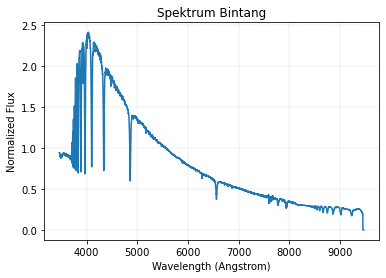

In [1]:
import astropy.units as u
from specutils import Spectrum1D
import numpy as np
import matplotlib.pyplot as plt

fluxunit = u.erg / (u.cm ** 2 * u.s)

file = np.loadtxt("spektrum_bintang.csv", delimiter = ",").T  
wave = file[0] * u.AA
flux = file[1] * fluxunit

spec = Spectrum1D(spectral_axis=wave, flux=flux)

#plot spectrum
fig, ax = plt.subplots() 
ax.plot(spec.spectral_axis, spec.flux)  
ax.set_xlabel("Wavelength (Angstrom)")  
ax.set_ylabel("Normalized Flux") 
ax.grid(color='grey', alpha=0.8, linestyle='-.', linewidth=0.2, axis='both') 
ax.set_title("Spektrum Bintang", loc='center', fontsize=12, fontweight=0.5)

#Show Plot
plt.show()


Periksalah data merentang pada panjang gelombang berapa. 

In [2]:
print(wave)

[3465.    3465.4   3465.8   ... 9468.2   9468.601 9469.   ] Angstrom


In [6]:
maks_flux = max(file [1])
print(maks_flux)

2.410843


***

## Plot kurva Planck

Kita akan membuat kurva radiasi benda hitam dari persamaan Planck,

\begin{aligned} B_{\lambda}(\lambda, T) = \frac{2hc^2}{\lambda^5} \frac{1}{e^{\frac{hc}{\lambda k_B T}} - 1} \end{aligned}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity

Definisikan rentang panjang gelombang sesuai data spektrum yang ada (perhatikan satuan yang diperlukan). 

Definisikan nilai temperatur sesuai perkiraan awal kita. Misal, kita gunakan nilai 8000 K.

In [8]:
wavelengths = file[0]*1.0e-10

blackbody = planck(wavelengths, 8000.)
maks = max(blackbody)

Plot kurva Planck tersebut,

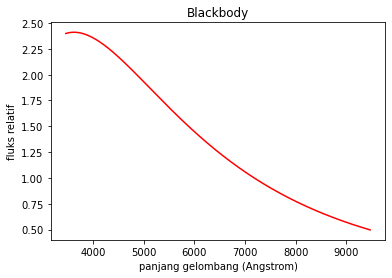

In [9]:
plt.plot(wavelengths*1e10, (blackbody*maks_flux/maks), 'r-', label="planck")

plt.title('Blackbody')
plt.ylabel('fluks relatif')
plt.xlabel('panjang gelombang (Angstrom)')
plt.grid(False)
plt.show()

***

## Melakukan overlay kurva Planck terhadap data

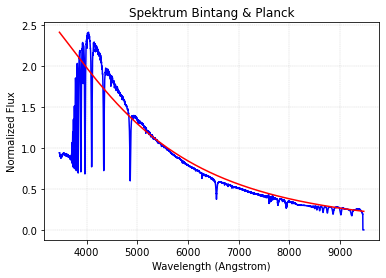

In [19]:
import astropy.units as u
from specutils import Spectrum1D
import numpy as np
import matplotlib.pyplot as plt

fluxunit = u.erg / (u.cm ** 2 * u.s)

# Data spektrum
file = np.loadtxt("spektrum_bintang.csv", delimiter = ",").T  
wave = file[0] * u.AA
flux = file[1] * fluxunit

spec = Spectrum1D(spectral_axis=wave, flux=flux)

# Kurva Planck
h = 6.626e-34
c = 3.0e+8
k = 1.38e-23

def planck(wav, T):
    a = 2.0*h*c**2
    b = h*c/(wav*k*T)
    intensity = a/ ( (wav**5) * (np.exp(b) - 1.0) )
    return intensity
wavelengths = file[0]*1.0e-10

blackbody = planck(wavelengths, 11000.)
maks = max(blackbody)

#plot spectrum
fig, ax = plt.subplots() 
ax.plot(spec.spectral_axis, spec.flux, 'b-', label="spectra")  
ax.plot(wavelengths*1e10, (blackbody*maks_flux/maks), 'r-', label="planck")

ax.set_xlabel("Wavelength (Angstrom)")  
ax.set_ylabel("Normalized Flux") 
ax.grid(color='grey', alpha=0.8, linestyle='-.', linewidth=0.2, axis='both') 
ax.set_title('Spektrum Bintang & Planck', loc='center', fontsize=12, fontweight=0.5)

#Show Plot
plt.show()

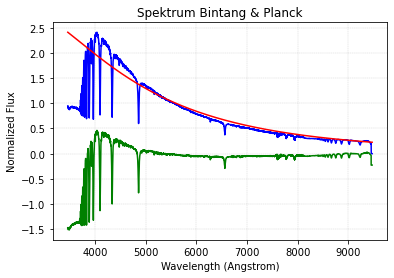

In [20]:
star = file[1]
diff = star - (blackbody*maks_flux/maks)

#plot spectrum
fig, ax = plt.subplots() 
ax.plot(spec.spectral_axis, spec.flux, 'b-', label="spectra")  
ax.plot(wavelengths*1e10, (blackbody*maks_flux/maks), 'r-', label="planck")
ax.plot(wavelengths*1e10, (diff), 'g-', label="error")

ax.set_xlabel("Wavelength (Angstrom)")  
ax.set_ylabel("Normalized Flux") 
ax.grid(color='grey', alpha=0.8, linestyle='-.', linewidth=0.2, axis='both') 
ax.set_title('Spektrum Bintang & Planck', loc='center', fontsize=12, fontweight=0.5)

#Show Plot
plt.show()